# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [107]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

9

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [108]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e3ccf44e02cf0a5895ed131fd26f64b2&units=imperial&q='

In [109]:
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 22},
 'cod': 200,
 'coord': {'lat': -23.1203, 'lon': -134.9692},
 'dt': 1644073663,
 'id': 4030556,
 'main': {'feels_like': 79.34,
          'grnd_level': 1018,
          'humidity': 73,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': 78.37,
          'temp_max': 78.37,
          'temp_min': 78.37},
 'name': 'Rikitea',
 'sys': {'country': 'PF', 'sunrise': 1644072139, 'sunset': 1644119129},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 82, 'gust': 12.03, 'speed': 11.07}}


In [110]:
# set up lists to hold reponse info
thiscity = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for idx, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        thiscity.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])                  
        print(f"Weather check for city {idx}: {city}")
    
    except:
        print(f"Missing result... city {idx}: {city} NOT FOUND")

Weather check for city 0: praia da vitoria
Weather check for city 1: rikitea
Weather check for city 2: harrisonburg
Weather check for city 3: hermanus
Weather check for city 4: punta arenas
Weather check for city 5: nogliki
Weather check for city 6: fairbanks
Weather check for city 7: talnakh
Weather check for city 8: port alfred


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [121]:
# create the data frame
weather_dict = {
    'city': cities,
    'lat': lat,
    'lon': lon,
    'max temp': max_temp,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind speed': wind_speed,
    'country': country,
    'date': date
}
city_df = pd.DataFrame(weather_dict)
city_df

,city,lat,lon,max temp,humidity,cloudiness,wind speed,country,date
0,praia da vitoria,38.7333,-27.0667,62.76,81,72,17.07,PT,1644073670
1,rikitea,-23.1203,-134.9692,78.37,73,22,11.07,PF,1644073663
2,harrisonburg,38.4496,-78.8689,30.24,53,75,10.36,US,1644073433
3,hermanus,-34.4187,19.2345,91.90,50,38,22.95,ZA,1644073558
4,punta arenas,-53.1500,-70.9167,62.71,51,75,21.85,CL,1644073572
5,nogliki,51.8333,143.1667,5.50,92,100,22.68,RU,1644073671
6,fairbanks,64.8378,-147.7164,1.09,78,0,0.00,US,1644073532
7,talnakh,69.4865,88.3972,-12.75,100,94,2.37,RU,1644073671
8,port alfred,-33.5906,26.8910,70.05,83,98,23.62,ZA,1644073563


In [113]:
# export to a CSV
city_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [114]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = city_df[(city_df['humidity'] > 100)]
high_humidity_df.index

Int64Index([], dtype='int64')

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#clean_city_df = city_df.join(high_humidity_df, how='outer')
#clean_city_df = pd.merge(city_df, high_humidity_df, on=index)
#clean_city_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [115]:
# date of analysis
find_date = city_df["date"][0]
run_date = pd.to_datetime(find_date, unit='s')
run_date

Timestamp('2022-02-05 15:07:50')

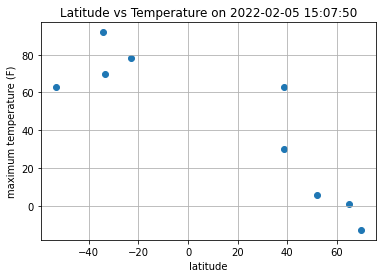

In [124]:
# lat vs temp basic plot
x = city_df['lat']
y = city_df['max temp']
plt.scatter(x, y)

# titles, labels, and design elements
plt.title(f'Latitude vs Temperature on {run_date}')
plt.xlabel('latitude')
plt.ylabel('maximum temperature (F)')
plt.grid()

# display plot
plt.show()

In [136]:
plt.savefig(Images/"LatVsTemp.png")

NameError: name 'Images' is not defined

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression